# LAB 2

# Exercise 1: A simple quadratic function

3.81944245563e-10 5.09258994084e-10


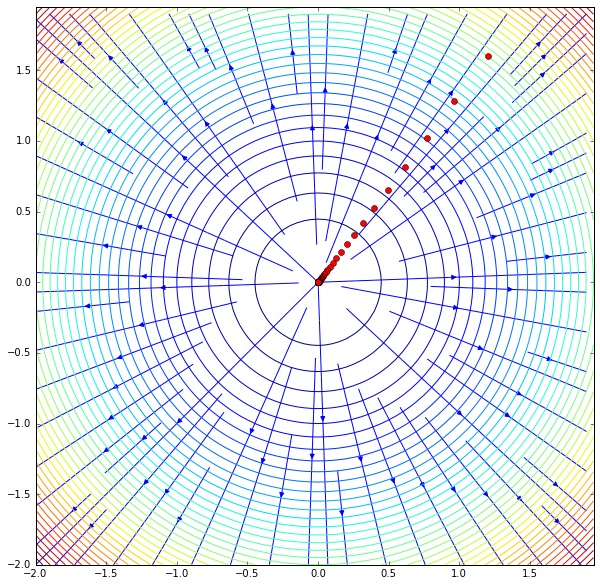

In [9]:
# Plot the function Gerard draws in lecture 1

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D

plt.figure(figsize=(10,10))
plt.contour(X, Y, Z, 50)

# Compute gradient 

X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
gradx = 2 * X
grady = 2 * Y 

plt.streamplot(X, Y, gradx, grady)


# gradient descent

alpha = 0.1  # step
pt = [1.5,2]   # initial point

def df_X(X):
    return 2*X
def df_Y(X):
    return 2*X

for k in range(1,100):
    pt[0] += -alpha * df_X(pt[0])
    pt[1] += -alpha * df_Y(pt[1])
    plt.plot(pt[0],pt[1],'ro')

print pt[0], pt[1]  
plt.show()

# Excercise 2:

$$       f(x_1,x_2) = x^2_1 (4- 2.1x^2_1+\frac{1}{3}x^4_1)+x_1x_2+x^2_2(-4+4x^2_2)  $$

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-2, 2, 0.1),
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.multiply(X**2,(4-2.1* X**2 + (1./3)*X**4)) + np.multiply(X,Y)+ np.multiply((Y**2),(-4+4*Y**2))

# Compute gradient 

gradx = 8*X-8.4*(X**3)+2*(X**5)+Y
grady = X - 8*Y + 16*(Y**3)

# define functions

def df_X(X,Y):
    return 8*X-8.4*(X**3)+2*(X**5)+Y

def df_Y(X,Y):
    return X-8*Y+16*(Y**3)

def f(X,Y):
    return (X**2)*(4-2.1* X**2 + (1./3)*X**4) + X*Y + (Y**2)*(-4+4*Y**2)


## 2.1 gradient descent with fixed step

[-0.08984201310031809, 0.7126564030207395]


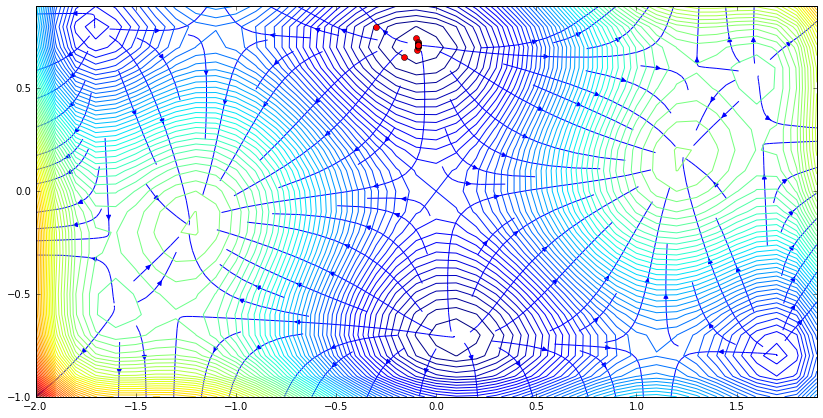

In [11]:
# Contour plot en 2D

plt.figure(figsize=(14,7))
plt.contour(X,Y,Z,100)
plt.streamplot(X, Y, gradx, grady)

# gradient descent with fixed step

alpha = 0.1  # step
pt = [-0.3,0.8]   # initial point
aux = pt[0]

for k in range(1,100):
    plt.plot(pt[0],pt[1],'ro')
    aux   += -alpha * df_X(pt[0],pt[1])
    pt[1] += -alpha * df_Y(pt[0],pt[1])
    pt[0] = aux      # this variable is added so when we update pt[1] using the original value of pt[0]

print pt


########### This code would work the same########
# aux = pt[:]
# for k in range(1,100):
#     plt.plot(pt[0],pt[1],'ro')
#     aux[0] += -alpha * df_X(pt[0],pt[1])
#     aux[1] += -alpha * df_Y(pt[0],pt[1])
#     pt = aux[:]
#################################################

## 2.2 gradient descent using the backtracking algorithm

[-0.08984201310034132, 0.7126564030205373]


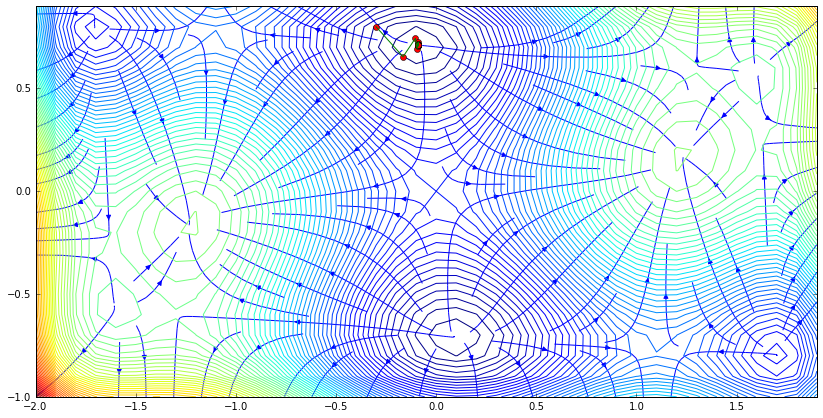

In [12]:
# gradient descent, with backtracking algorithm try to compute a good value of alpha (step)
from copy import deepcopy

alpha = 100  # initial step
pt = [-0.3,0.8]   # initial point
aux = deepcopy(pt)

listax = [pt[0]]
listay = [pt[1]]

plt.figure(figsize=(14,7))

iter = 0
while alpha > 10**(-5) and iter<=150:  
    iter +=1

    #aux[0] += - alpha * df_X(pt[0],pt[1])
    #aux[1] += - alpha * df_Y(pt[0],pt[1])  

    if f(pt[0]- alpha * df_X(pt[0],pt[1]), pt[1]- alpha * df_Y(pt[0],pt[1]))> f(pt[0],pt[1]):
        alpha = alpha/2.
        #print alpha, f(pt[0]- alpha * df_X(pt[0],pt[1]), pt[1]- alpha * df_Y(pt[0],pt[1])), f(pt[0],pt[1]),

    else: 
        #print "\niter:", iter , "\nalpha", alpha, ",pt:", pt, ",aux:", aux,  "\nf1" ,f(aux[0], aux[1]), ",f",f(pt[0], pt[1])
        plt.plot(pt[0],pt[1],'ro')
        aux[0] = aux[0]-alpha * df_X(pt[0],pt[1])
        aux[1] = aux[1]-alpha * df_Y(pt[0],pt[1])
        pt = list(aux)

        listax.append(pt[0])
        listay.append(pt[1])
print pt

# Contour plot en 2D

plt.contour(X,Y,Z,100)
plt.streamplot(X, Y, gradx, grady)
plt.plot(listax,listay)

# Exercise 3: The Rosenbrock function

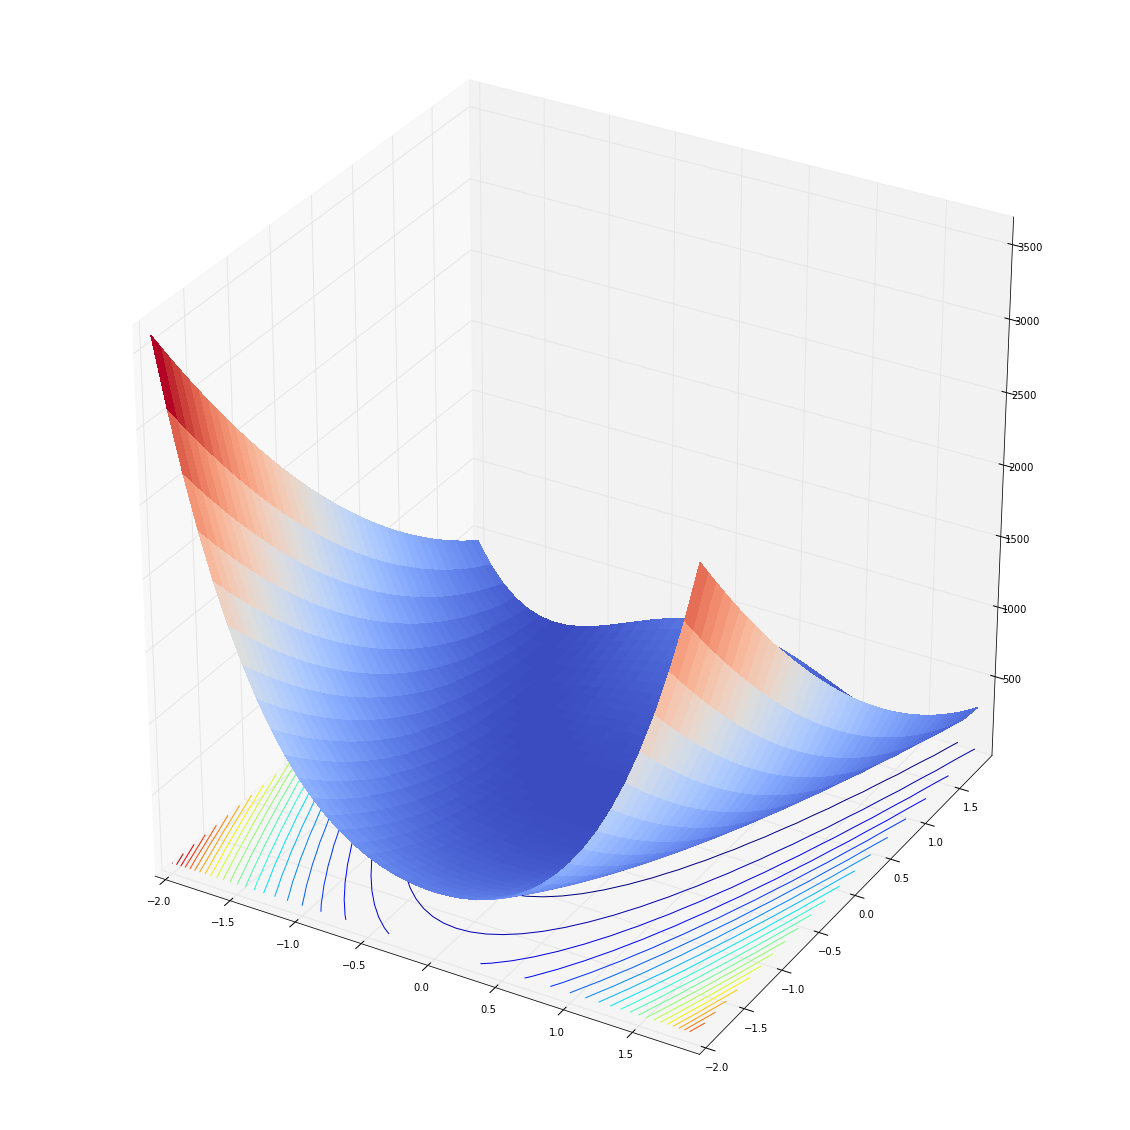

In [4]:

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# Rosenbrock function
a=1
b=100
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (a-X)**2+b*(Y-(X**2))**2

# define functions

def df_X(X,Y):
    return -2 *(a-X)-4*b*(Y-X**2)*X
def df_Y(X,Y):
    return 2*b*Y - 2*b*X**2
def f(X,Y):
    return (a-X)**2+b*(Y-(X**2))**2

# Compute gradient 

gradx = -2 *(a-X)-4*b*(Y-X**2)*X
grady = 2*b*Y - 2*b*X**2

# Surface plot 3D + contour plot
fig = plt.figure(figsize=(20,20))
 
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.contour(X,Y,Z,30,zdir='z',offset=0)

plt.contour(X,Y,Z,100)

plt.show()


[0.682975495344748, 0.4649422132105495]


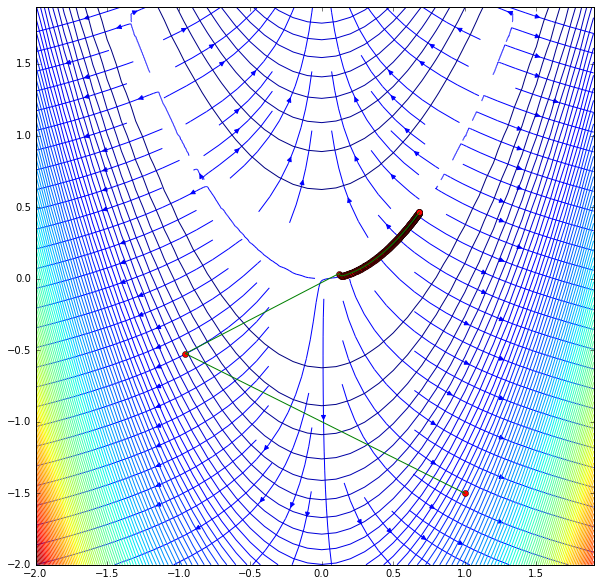

In [5]:
# gradient descent, adapting the value of alpha   # CHECK!!!
 
plt.figure(figsize=(10,10))
alpha = 1       # step
pt = [1.,-1.5]   # initial point
aux = pt[:]

listax = [pt[0]]
listay = [pt[1]]


#backtracking algorithm
for k in range(1,500):
    plt.plot(pt[0],pt[1],'ro')
    #print pt
    # update alpha if needed
    while f(pt[0]-alpha*df_X(pt[0],pt[1]), pt[1]-alpha*df_Y(pt[0],pt[1]))> f(pt[0],pt[1]):
        alpha = alpha/2.
    aux[0] += -alpha * df_X(pt[0],pt[1])
    aux[1] += -alpha * df_Y(pt[0],pt[1])
    pt = aux[:]
    
    listax.append(pt[0])
    listay.append(pt[1])
    
    if alpha < 10**(-10):
        print "alpha: ", alpha
        print "k: ",k
        break
    
print pt   

# Contour plot en 2D
plt.contour(X,Y,Z,100)
plt.streamplot(X, Y, gradx, grady)
plt.plot(listax,listay)
plt.show()